## Optimization Lecture 7: Line search algorithms

Goal: to describe 1D minimization algorithms. 

These are important for two main reasons: 1) they provide a preview of higher-dimensional optimization algorithms, and 2) they are often at the core of individual iterations within higher-dimensional optimization algorithms. 

In [1]:
## MP 573 Part 2, Lecture 7: Line search algorithms
##
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio
import scipy.optimize as opt
import numpy.random as rnd
import time

font = {'weight' : 'normal',
        'size'   : 20}

In [2]:
# Let's define a function to be minimized
def myfunction(x):
    p = np.array([0.005, -0.42, 4, 400, 12])
    p1 = np.polyder(p)
    p2 = np.polyder(p1)
    f = np.polyval(p,x)
    f1 = np.polyval(p1,x)
    f2 = np.polyval(p2,x)
    return f, f1, f2

Minimizer xopt
-13.75
Value of f at xopt
-3461.19091796875


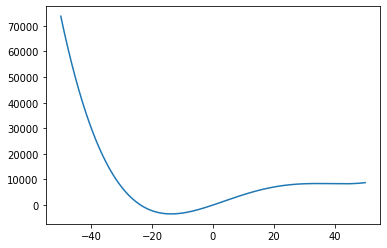

In [3]:
# Let's plot the function
xmax = 50
x = np.linspace(-xmax,xmax,2001)
f,f1,f2 = myfunction(x)

plt.plot(x,f)
#plt.axis([-xmax, xmax, -20, 6000])

imin = np.argmin(f)
xopt = x[imin]
print('Minimizer xopt')
print(xopt)
print('Value of f at xopt')
print(f[imin])

Number of iterations = 
37
Final answer xhat = 
-13.746092693010832
Value of f at xopt
-3461.191330045192
Value of first derivative at xopt
8.26144571419718e-07
Value of second derivative at xopt
53.97745744587804


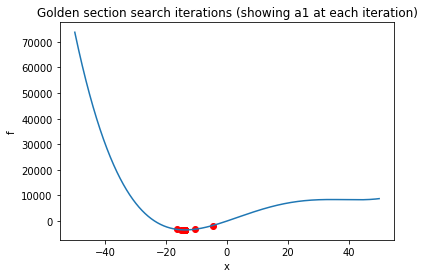

In [4]:
## Golden section search

# Set algorithm parameters and initialize arrays
MAX_ITER = 100
MIN_XDIF = 1E-6
a0 = -20;
b0 = 20;
rho = 0.382;
alla = np.zeros((MAX_ITER,1))
allb = np.zeros((MAX_ITER,1))
allfa = np.zeros((MAX_ITER,1))
allfb = np.zeros((MAX_ITER,1))

## Iterate
k=0;
dx = MIN_XDIF + 1;
while k<MAX_ITER and np.abs(dx) > MIN_XDIF:
    a1 = a0 + rho*(b0-a0); # Note my implementation does not take advantage of the golden section cleverness, for simplicity
    b1 = b0 - rho*(b0-a0);
    fa,fa1,fa2 = myfunction(a1);
    fb,fb1,fb2 = myfunction(b1);
    alla[k] = a1
    allb[k] = b1
    allfa[k] = fa
    allfb[k] = fb
    
    if fb<fa:
        a0 = a1;
    else:
        b0 = b1;
    k = k+1;
    dx = b0-a0;

## Plot iterations and print final xhat    
plt.plot(alla[0:k],allfa[0:k],'or')
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Golden section search iterations (showing a1 at each iteration)')
print('Number of iterations = ')
print(k)
print('Final answer xhat = ')
print((a1+b1)/2)   
fhat,fhat1,fhat2 = myfunction((a1+b1)/2);
print('Value of f at xopt')
print(fhat)
print('Value of first derivative at xopt')
print(fhat1)
print('Value of second derivative at xopt')
print(fhat2)




Number of iterations = 
8
Final answer xhat = 
[-13.74609271]
Value of f at xopt
[-3461.19133005]
Value of first derivative at xopt
[5.68434189e-14]
Value of second derivative at xopt
[53.97745751]


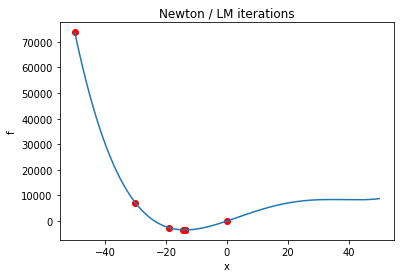

In [9]:
## Newton's method

## Set algorithm parameters
MAX_ITER = 100 # Max number of iterations
MIN_XDIF = 1E-6 # Min change in x allowable (otherwise stop)
x0 = 0 # Initial guess
mu0 = 0 # mu0 > 0 for LM instead of Newton's
k=0 # Counter
xk = np.zeros((MAX_ITER,1)) # Here we will store our x values as we iterate
fk = np.zeros((MAX_ITER,1)) # Here we will store our f values
xk[0] = x0 # Initial guess
dx = MIN_XDIF + 1 # Just so it doesn't stop before starting the iterations

## Iteratively try to find the optimum
while k<(MAX_ITER-1) and np.abs(dx) > MIN_XDIF: # Keep iterating unless we reach NUM_ITER or x doesn't change much
    f0,f1,f2 = myfunction(xk[k]) # Calculate f, f', f'' for quadratic approximation
    fk[k] = f0
    k = k+1
    xk[k] = xk[k-1] - f1/(f2+mu0) # Update x based on current quadratic approximation
    dx = xk[k] - xk[k-1]

fhat,fhat1,fhat2 = myfunction(xk[k]) # Calculate the final f value, for plot
fk[k] = fhat

## Plot iterations and print final xhat
plt.plot(xk[0:k+1],fk[0:k+1],'or')
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Newton / LM iterations')
print('Number of iterations = ')
print(k)
print('Final answer xhat = ')
print(xk[k])
print('Value of f at xopt')
print(fhat)
print('Value of first derivative at xopt')
print(fhat1)
print('Value of second derivative at xopt')
print(fhat2)